In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from keras.optimizers import Adam
from keras.utils import to_categorical

In [31]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
scalerx = StandardScaler().fit(xt)
xScaled = scalerx.transform(xt)
yt = to_categorical(yt,2)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.1, shuffle=True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, shuffle=True)
counterx=0
countery=0
add = []
for idx, i in enumerate(y_train):
        if i[1] == 1:
            counterx += 4
            for k in range(0, 4):
                y_train = np.vstack((y_train, i))
                add = np.append(add, X_train[idx, :])
        else: 
             countery += 1
X_train = np.append(X_train, add)
print(counterx/(counterx+countery), countery/(counterx+countery), counterx, countery)

0.3956436350651669 0.604356364934833 2216 3385


In [114]:
MLP = Sequential()
MLP.add(Convolution2D(32, (2,2), input_shape=(28,28,3), activation='relu'))
MLP.add(MaxPooling2D(pool_size=(2,2)))
MLP.add(Convolution2D(32, (2,2), activation='relu'))
MLP.add(MaxPooling2D(pool_size=(2,2)))
MLP.add(Convolution2D(16, (2,2), activation='relu'))
MLP.add(MaxPooling2D(pool_size=(2,2)))
MLP.add(Flatten()) 
MLP.add(Dense(64, activation='relu'))
MLP.add(Dense(32, activation='relu'))
MLP.add(Dense(2, activation='softmax'))
X_test = X_test.reshape(-1, 28,28,3)
X_train = X_train.reshape(-1, 28,28,3)
X_validation = X_validation.reshape(-1, 28,28,3)

In [115]:
# MLP = Sequential()
# MLP.add(Dense(64,input_dim=28*28*3, activation='relu'))
# MLP.add(Dense(32, activation='relu'))
# MLP.add(Dense(2, activation='softmax'))
#X_train = X_train.reshape(-1, 28*28*3)

In [116]:
#MLP.summary()

In [117]:
MLP.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

In [118]:
callback = EarlyStopping(monitor='val_loss', patience=8, mode='auto', verbose=1, restore_best_weights=True, min_delta=0.0001)
hist = MLP.fit(x=X_train, y=y_train, epochs=50, validation_data=(X_validation, y_validation), verbose=2, batch_size=300, callbacks=[callback])

Epoch 1/50
21/21 - 3s - loss: 0.6164 - accuracy: 0.6731 - mse: 0.2136 - val_loss: 0.5702 - val_accuracy: 0.6436 - val_mse: 0.1962 - 3s/epoch - 148ms/step
Epoch 2/50
21/21 - 2s - loss: 0.5134 - accuracy: 0.7204 - mse: 0.1735 - val_loss: 0.4760 - val_accuracy: 0.6939 - val_mse: 0.1665 - 2s/epoch - 89ms/step
Epoch 3/50
21/21 - 2s - loss: 0.4609 - accuracy: 0.7610 - mse: 0.1556 - val_loss: 0.4584 - val_accuracy: 0.6986 - val_mse: 0.1623 - 2s/epoch - 87ms/step
Epoch 4/50
21/21 - 2s - loss: 0.4346 - accuracy: 0.7802 - mse: 0.1455 - val_loss: 0.3975 - val_accuracy: 0.7774 - val_mse: 0.1360 - 2s/epoch - 92ms/step
Epoch 5/50
21/21 - 2s - loss: 0.4198 - accuracy: 0.7888 - mse: 0.1404 - val_loss: 0.3357 - val_accuracy: 0.8360 - val_mse: 0.1119 - 2s/epoch - 88ms/step
Epoch 6/50
21/21 - 2s - loss: 0.4192 - accuracy: 0.7893 - mse: 0.1402 - val_loss: 0.4427 - val_accuracy: 0.7288 - val_mse: 0.1563 - 2s/epoch - 86ms/step
Epoch 7/50
21/21 - 2s - loss: 0.3984 - accuracy: 0.8018 - mse: 0.1324 - val_loss:

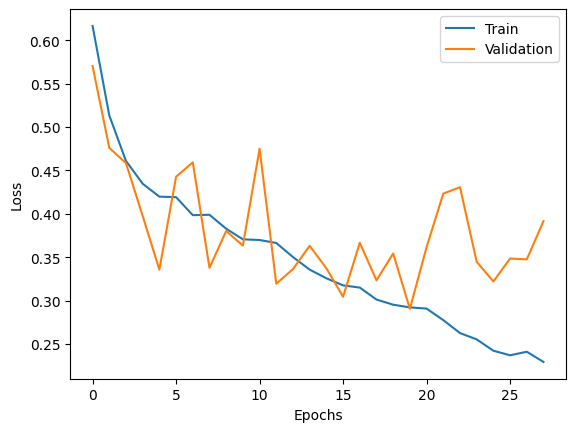

In [119]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [120]:
from sklearn.metrics import f1_score
y_pred = MLP.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
MLP.evaluate(X_test, y_test, verbose=1)
y_comp = np.argmax(y_test, axis=1)
print("F1 ->", f1_score(y_comp, y_pred))


20/20 [==============================] - 0s 4ms/step - loss: 0.3358 - accuracy: 0.8227 - mse: 0.1132
F1 -> 0.4931506849315069


In [121]:
counter = 0
for i in range(len(y_comp)):
    if(y_pred[i] != y_comp[i]):
        #print(i, "\t", y_pred[i], "\t", y_test[i])
        counter+=1
counter

111

In [122]:
tn, fp, fn, tp = confusion_matrix(y_comp, y_pred).ravel()
tn, fp, fn, tp

(461, 57, 54, 54)